# EDA IBM stock 1min ticks

## Takeouts -  december 29/2019
* The distribution of the difference of the time series has very long tails: see plot. This was expected; still very ugly.
* Created a very clean dataset with 'pastValues', 'currentValue', 'futureValue', 'deltaMinutes'. 
* The precision recall curve that we already have looks quite good: we trained one single time.

## Takeouts -  december 30/2019
* Plot a precision recall curve with several(monthly/weekly) training batches

## To do

* The current version of the target is not very realistic.
* Need a more elaborated way of looking at histograms: the tails don't let me see anything: those tails are a huge concern.
* Look out for sklearn methods to do crossvalidation in our setting: do not reinvent the wheel.

In [1]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [2]:
from modeling.dataSetUtilities import createTrainingDataSet
from modeling.generatePipeline import generatePipeline

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier ## might not be necessary in the future?

In [4]:
names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_csv('data/sampleKibotData/minuteIntraday/IBM_adjusted.txt', header=None, names=names)
df['DateTime']= pd.to_datetime((df.Date+' '+df.Time),infer_datetime_format=True) 
df = df.drop(columns=['Date', 'Time'])
df = df.set_index('DateTime')


In [5]:
df.head()

,Open,High,Low,Close,Volume
DateTime,,,,,
1998-01-02 09:30:00,33.69,33.69,33.69,33.69,207820
1998-01-02 09:31:00,33.65,33.69,33.65,33.65,33499
1998-01-02 09:32:00,33.67,33.69,33.65,33.69,41254
1998-01-02 09:33:00,33.67,33.69,33.65,33.65,52110
1998-01-02 09:34:00,33.65,33.69,33.65,33.65,14892


In [9]:
df = df[-30000:]

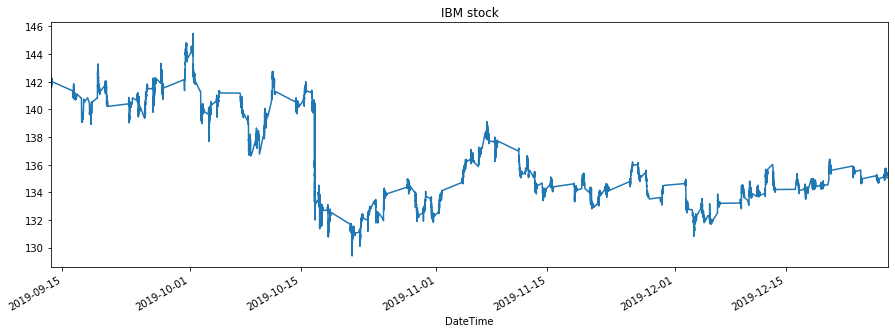

In [10]:
#df.head()
df.Open.plot(figsize=(15,5), title='IBM stock');
#df.index.map(lambda x: x.year).value_counts().sort_index().plot.bar(figsize=(15, 5), title='ticks per year');
#df.Open.diff().plot.hist(bins=200, figsize=(15,5), title= 'distribution of the differential');
#pd.Series(df.index.map(lambda x: x.day)).value_counts().sort_index().plot.bar()

In [11]:
dg  = createTrainingDataSet(df, presentStart=1, pastStart=5, futureEnd=-30)

In [12]:
dg.target.value_counts()

False    12846
True     12572
Name: target, dtype: int64

In [13]:
X = dg.copy()
y = X.pop('target')

In [14]:
X.shape

(25418, 7)

In [15]:
X.head()

,DateTime,Open,High,Low,Close,Volume,unthresholdedTarget
DateTime,,,,,,,
2019-09-13 13:35:00,"[2019-09-13 13:30:00, 2019-09-13 13:31:00, 201...","[142.1, 142.12, 142.12, 142.05, 142.07, 141.99]","[142.12, 142.14, 142.12, 142.06, 142.07, 142.07]","[142.1, 142.09, 142.07, 142.05, 142.02, 141.99]","[142.12, 142.13, 142.07, 142.06, 142.02, 142.04]","[425.0, 1539.0, 708.0, 202.0, 460.0, 3014.0]",-0.000577
2019-09-13 13:36:00,"[2019-09-13 13:31:00, 2019-09-13 13:32:00, 201...","[142.12, 142.12, 142.05, 142.07, 141.99, 142.0]","[142.14, 142.12, 142.06, 142.07, 142.07, 142.01]","[142.09, 142.07, 142.05, 142.02, 141.99, 141.99]","[142.13, 142.07, 142.06, 142.02, 142.04, 142.01]","[1539.0, 708.0, 202.0, 460.0, 3014.0, 462.0]",-0.000433
2019-09-13 13:37:00,"[2019-09-13 13:32:00, 2019-09-13 13:33:00, 201...","[142.12, 142.05, 142.07, 141.99, 142.0, 141.97]","[142.12, 142.06, 142.07, 142.07, 142.01, 142.01]","[142.07, 142.05, 142.02, 141.99, 141.99, 141.97]","[142.07, 142.06, 142.02, 142.04, 142.01, 142.01]","[708.0, 202.0, 460.0, 3014.0, 462.0, 708.0]",-0.000304
2019-09-13 13:38:00,"[2019-09-13 13:33:00, 2019-09-13 13:34:00, 201...","[142.05, 142.07, 141.99, 142.0, 141.97, 141.99]","[142.06, 142.07, 142.07, 142.01, 142.01, 142.0]","[142.05, 142.02, 141.99, 141.99, 141.97, 141.96]","[142.06, 142.02, 142.04, 142.01, 142.01, 141.98]","[202.0, 460.0, 3014.0, 462.0, 708.0, 607.0]",-0.000244
2019-09-13 13:39:00,"[2019-09-13 13:34:00, 2019-09-13 13:35:00, 201...","[142.07, 141.99, 142.0, 141.97, 141.99, 141.98]","[142.07, 142.07, 142.01, 142.01, 142.0, 141.99]","[142.02, 141.99, 141.99, 141.97, 141.96, 141.98]","[142.02, 142.04, 142.01, 142.01, 141.98, 141.99]","[460.0, 3014.0, 462.0, 708.0, 607.0, 818.0]",-0.000234


## A precision recall-curve with only one training split.

In [16]:
# temporal split of train/test
trainPercentage = 50
testBegins = (len(X)*trainPercentage)//100
Xtrain, ytrain = X[:testBegins], y[:testBegins]
Xtest, ytest = X[testBegins:], y[testBegins:]

In [17]:
model = generatePipeline()
model.fit(Xtrain, ytrain)

/Users/lduque/Desktop/MyProjects/moneyManager/venv-money/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('selectcolumns',
                 ColumnSelector(columns=['Open', 'High', 'Low', 'Close',
                                         'Volume'])),
                ('scaletimeseries',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function timeSeriesScaler at 0x11bb71158>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('featurengineering',
                 FunctionTransformer(accept_spars...
                 TransformationWrapper(transformation=MinMaxScaler(copy=True,
                                                                   feature_range=(0,
                                                                                  1)))),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                          

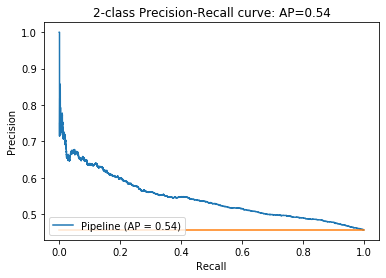

In [18]:
base_rate = sum(ytest)/len(ytest)
ypredicted=model.predict_proba(Xtest)[:,1]
average_precision = average_precision_score(ytest, ypredicted)
disp = plot_precision_recall_curve(model, Xtest, ytest)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.plot([0, 1], [base_rate, base_rate]);

In [39]:
evaluationDF = pd.DataFrame({'predicted':ypredicted, 'target':ytest, 'unthresholdedTarget':Xtest.unthresholdedTarget}, index=Xtest.index)
topPredictions = evaluationDF.sort_values(by='predicted', ascending=False)[:100]

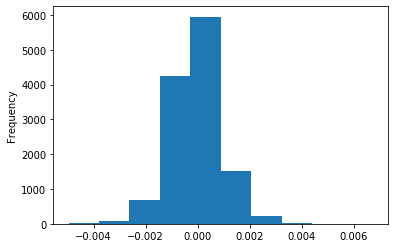

In [40]:
evaluationDF.unthresholdedTarget.plot.hist()

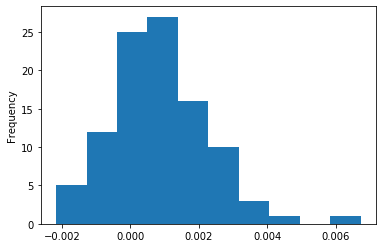

In [41]:
topPredictions.unthresholdedTarget.plot.hist()

In [42]:
print(evaluationDF.unthresholdedTarget.mean())
print(topPredictions.unthresholdedTarget.mean())

-6.544810221910966e-05
0.0008545406713984158


In [43]:
print(evaluationDF.unthresholdedTarget.median())
print(topPredictions.unthresholdedTarget.median())

-7.315745135769097e-05
0.0006417696312759471


In [49]:
topPredictions

,predicted,target,unthresholdedTarget
DateTime,,,
2019-12-12 10:03:00,0.861194,True,0.002109
2019-11-08 09:50:00,0.842287,True,0.000963
2019-12-12 09:35:00,0.835424,True,0.006730
2019-12-13 10:02:00,0.831981,True,0.000409
2019-12-10 10:12:00,0.829376,False,-0.000952
...,...,...,...
2019-11-19 10:19:00,0.706061,True,0.000049
2019-11-15 15:14:00,0.705970,False,-0.001020
2019-12-04 10:21:00,0.705750,False,-0.000255


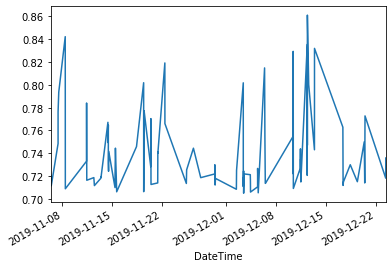

In [63]:
topPredictions.predicted.sort_index().plot()

In [ ]:
## now lets do the same but predict when performance is going to be below median
ytrain_neg = ~(ytrain)
ytest_neg = ~(ytest)
model = generatePipeline()
model.fit(Xtrain, ytrain_neg)

In [ ]:
base_rate = sum(ytest_neg)/len(ytest_neg)
ypredicted_neg=model.predict_proba(Xtest)[:,1]
average_precision = average_precision_score(ytest_neg, ypredicted_neg)
disp = plot_precision_recall_curve(model, Xtest, ytest_neg)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.plot([0, 1], [base_rate, base_rate]);

# A precision-recall curve with multiple training batches: this probably needs some rewriting ! (maybe with crossvalidation?)

In [ ]:
X = pd.concat([dg.pastValues.apply(lambda x:pd.Series(x)), dg.currentValue, dg.target], axis=1)
firstTimeStamp=X.index[0]
first_day = datetime(firstTimeStamp.year, firstTimeStamp.month, firstTimeStamp.day)
X['week']=pd.Series(X.index).apply(lambda x: (datetime(x.year, x.month, x.day)-first_day).days//7).values

In [ ]:
# notice that for the week zero we wont have a model.
trainSets = [X[X.week==w] for w in X.week.unique()]
trainTestBarches = [(None, None, None, None)]+[(trainSets[i].drop(columns='target'),trainSets[i].target,trainSets[i+1].drop(columns='target'),trainSets[i+1].target) for i in range(len(trainSets)-1)]
models = [None] + [GridSearchCV(regr, parameters, cv=2, scoring='average_precision') for _ in range(len(trainSets)-1)]

In [ ]:
Xtrain, ytrain, Xtest, ytest = trainTestBarches[1]

In [ ]:
Xtrain # notice: week should not be in the model, but its ok for now

In [ ]:
for i in range(1, len(models)):
    print(i)
    Xtrain, ytrain, Xtest, ytest = trainTestBarches[i]
    models[i].fit(Xtrain.div(Xtrain.currentValue, axis=0), ytrain)

In [ ]:
# this function is worth saving somewhere !
def indexedModelEvaluation(x):
    row = x.copy()
    week = row['week']
    row = row.drop('target')
    row = [list(row/row.currentValue)]
    model = models[week]
    return np.nan if model==None else model.predict_proba(row)[0][1]

In [ ]:
ypredicted = X.apply(indexedModelEvaluation,axis=1)

In [ ]:
X['predicted']=ypredicted

In [ ]:
dh = X[['predicted', 'target']].copy()

In [ ]:
dh = dh[dh.predicted.notna()] 

In [ ]:
ytest = dh.target
ypredicted = dh.predicted
base_rate = sum(ytest)/len(ytest)
average_precision = average_precision_score(ytest, ypredicted)
precision, recall, _ = precision_recall_curve(ytest, ypredicted)

In [ ]:
plt.plot(recall, precision)
plt.plot([0, 1], [base_rate, base_rate]);

In [ ]:
A = [-1, -1, -1, -1, -1 ,6,7,8,9,10]

In [ ]:
np.percentile(A, 100)

In [ ]:
np.median(A)